In [ ]:
class Monad:
    def __init__(self, value):
        self.value = value
    
    @staticmethod
    def unit(value):
        return Monad(value)
    
    def bind(self, func):
        return func(self.value)

In [ ]:
class Functor:
    def __init__(self, value):
        self.value = value
    
    def map(self, func):
        return Functor(func(self.value))

In [ ]:
class Maybe:
    def __init__(self, value):
        self.value = value
    
    @staticmethod
    def of(value):
        return Maybe(value)
    
    def is_nothing(self):
        return self.value is None
    
    def map(self, func):
        if self.is_nothing():
            return Maybe(None)
        return Maybe(func(self.value))

In [ ]:
#ตัวอย่างการใช้ Maybe Functor
#python# การใช้งาน Maybe เพื่อจัดการกับค่าที่อาจเป็น None
# การใช้งาน Maybe เพื่อจัดการกับค่าที่อาจเป็น None
def get_user(user_id):
    # สมมติว่านี่คือฐานข้อมูลผู้ใช้
    users = {1: "Alice", 2: "Bob", 3: "Charlie"}
    return users.get(user_id)  # อาจจะคืนค่า None ถ้าไม่พบผู้ใช้

# การเขียนโค้ดแบบปกติ
user_id = 4
user = get_user(user_id)
if user is not None:
    print(f"Found user: {user.upper()}")
else:
    print("User not found")

# การเขียนโค้ดด้วย Maybe functor
maybe_user = Maybe(get_user(user_id))
# map จะไม่ทำงานถ้าค่าเป็น None
upper_name = maybe_user.map(lambda name: name.upper())
print(f"Result: {upper_name.value if upper_name.value is not None else 'User not found'}")

In [ ]:
#ตัวอย่าง Applicative Maybe
#python

class MaybeApplicative(Maybe):
    @staticmethod
    def pure(value):
        return MaybeApplicative(value)
    
    def apply(self, maybe_func):
        if self.is_nothing() or maybe_func.is_nothing():
            return MaybeApplicative(None)
        return MaybeApplicative(maybe_func.value(self.value))

# ตัวอย่างการใช้งาน
maybe_num = MaybeApplicative(5)
maybe_func = MaybeApplicative(lambda x: x * 2)
result = maybe_num.apply(maybe_func)  # MaybeApplicative(10)

In [ ]:
class Monad(Applicative):
    def bind(self, func):
        # func คืนค่าเป็น Monad ใหม่
        return func(self.value)

Maybe Monad
Maybe Monad ใช้จัดการกับค่าที่อาจเป็น None อย่างปลอดภัย:

In [ ]:
class MaybeMonad:
    def __init__(self, value):
        self.value = value
    
    @staticmethod
    def unit(value):
        return MaybeMonad(value)
    
    def is_nothing(self):
        return self.value is None
    
    def bind(self, func):
        if self.is_nothing():
            return MaybeMonad(None)
        return func(self.value)

In [ ]:
# สมมติมีฐานข้อมูลและฟังก์ชันค้นหา ตัวอย่างการใช้ Maybe Monad
def get_user(user_id):
    users = {1: {"name": "Alice", "email": "alice@example.com"},
             2: {"name": "Bob", "email": "bob@example.com"}}
    return users.get(user_id)

def get_email(user):
    return user.get("email") if user else None

# แบบดั้งเดิม
user_id = 3
user = get_user(user_id)
if user:
    email = get_email(user)
    if email:
        print(f"Email: {email}")
    else:
        print("No email found")
else:
    print("User not found")

# แบบใช้ Maybe Monad
def find_user(user_id):
    return MaybeMonad(get_user(user_id))

def find_email(user):
    return MaybeMonad(get_email(user))

result = find_user(user_id).bind(find_email)
print(f"Result: {result.value if result.value else 'Not found'}")

In [ ]:
#Either Monad
class Either:
    def __init__(self, value, is_right=True):
        self.value = value
        self.is_right = is_right
    
    @staticmethod
    def right(value):
        return Either(value, True)
    
    @staticmethod
    def left(error):
        return Either(error, False)
    
    def bind(self, func):
        if not self.is_right:
            return self
        return func(self.value)

In [ ]:
def divide(a, b):
    if b == 0:
        return Either.left("Division by zero")
    return Either.right(a / b)

def calculate_tax(amount):
    if amount < 0:
        return Either.left("Amount cannot be negative")
    return Either.right(amount * 0.2)

# การเชื่อมต่อการคำนวณที่อาจเกิดข้อผิดพลาด
result = divide(100, 5).bind(calculate_tax)
if result.is_right:
    print(f"Tax: {result.value}")
else:
    print(f"Error: {result.value}")

result_error = divide(100, 0).bind(calculate_tax)
if result_error.is_right:
    print(f"Tax: {result_error.value}")
else:
    print(f"Error: {result_error.value}")

IO Monad ในไพทอน (แนวคิด)

In [ ]:
class IO:
    def __init__(self, effect):
        self.effect = effect
    
    @staticmethod
    def unit(value):
        return IO(lambda: value)
    
    def bind(self, func):
        # func คืนค่าเป็น IO ใหม่
        return IO(lambda: func(self.effect()).effect())
    
    def run(self):
        return self.effect()

# ตัวอย่างการใช้งาน
def get_input():
    return IO(lambda: input("Enter something: "))

def print_value(value):
    return IO(lambda: print(f"You entered: {value}"))

# สร้างโปรแกรมโดยไม่มีการรันจริง
program = get_input().bind(print_value)
# รันโปรแกรมเมื่อต้องการ
program.run()

State Monad ในไพทอน

In [ ]:
class State:
    def __init__(self, run_state):
        self.run_state = run_state
    
    @staticmethod
    def unit(value):
        return State(lambda state: (value, state))
    
    def bind(self, func):
        def new_state_func(state):
            value, new_state = self.run_state(state)
            return func(value).run_state(new_state)
        return State(new_state_func)
    
    def evaluate(self, initial_state):
        value, _ = self.run_state(initial_state)
        return value
    
    def execute(self, initial_state):
        _, final_state = self.run_state(initial_state)
        return final_state

# ตัวอย่าง: การนับจำนวนครั้งที่มีการเรียกใช้ฟังก์ชัน
def increment():
    return State(lambda count: (None, count + 1))

def get_count():
    return State(lambda count: (count, count))

# สร้างโปรแกรมที่เพิ่มค่าสามครั้งและดูผลลัพธ์
program = (increment()
          .bind(lambda _: increment())
          .bind(lambda _: increment())
          .bind(lambda _: get_count()))

final_count = program.evaluate(0)  # 3

In [ ]:
# ตัวอย่างการใช้ returns
from returns.maybe import Maybe
from returns.result import Result

def find_user(id):
    # ...
    return Maybe.from_value(user) if user else Maybe.from_none()

def get_email(user):
    # ...
    return Result.from_value(email) if valid else Result.from_failure("Invalid email")

# การเชื่อมต่อการคำนวณ
result = find_user(123).bind(get_email)

ตัวอย่างการแก้ปัญหาในโลกจริง

In [ ]:
# ตัวอย่างระบบตรวจสอบการทำธุรกรรม
from returns.result import Result
from returns.pipeline import flow
from returns.pointfree import bind

def validate_amount(transaction):
    if transaction['amount'] <= 0:
        return Result.from_failure('Amount must be positive')
    return Result.from_value(transaction)

def check_balance(transaction):
    if transaction['balance'] < transaction['amount']:
        return Result.from_failure('Insufficient funds')
    return Result.from_value(transaction)

def update_balance(transaction):
    new_balance = transaction['balance'] - transaction['amount']
    return Result.from_value({**transaction, 'balance': new_balance})

# การใช้โมแนดเพื่อทำการตรวจสอบเป็นลำดับ
def process_transaction(transaction):
    return flow(
        transaction,
        validate_amount,
        bind(check_balance),
        bind(update_balance)
    )

# ทดสอบ
result1 = process_transaction({'amount': 100, 'balance': 500})  # Success
result2 = process_transaction({'amount': -10, 'balance': 500})  # Failure
result3 = process_transaction({'amount': 1000, 'balance': 500})  # Failure

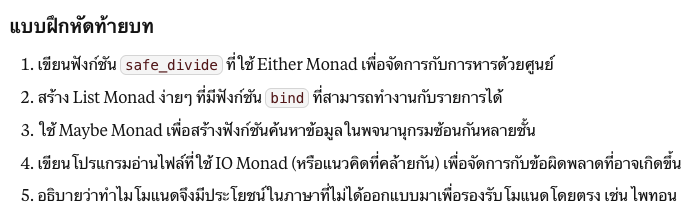

In [ ]:
#Pr1 เฉลยแบบฝึกหัด (ข้อที่ 1 - safe_divide)
class Either:
    def __init__(self, value, is_right=True):
        self.value = value
        self.is_right = is_right
    
    @staticmethod
    def right(value):
        return Either(value, True)
    
    @staticmethod
    def left(error):
        return Either(error, False)
    
    def bind(self, func):
        if not self.is_right:
            return self
        return func(self.value)

def safe_divide(a, b):
    if b == 0:
        return Either.left("Division by zero")
    return Either.right(a / b)

# ทดสอบ
result1 = safe_divide(10, 2)
result2 = safe_divide(5, 0)

print(f"Result 1: {result1.value if result1.is_right else f'Error: {result1.value}'}")
print(f"Result 2: {result2.value if result2.is_right else f'Error: {result2.value}'}")

In [ ]:
#Pr2 เฉลยแบบฝึกหัด (ข้อที่ 2 - List Monad)
class ListMonad:
    def __init__(self, values):
        self.values = values if isinstance(values, list) else [values]
    
    @staticmethod
    def unit(value):
        return ListMonad([value])
    
    def bind(self, func):
        # func คืนค่าเป็น ListMonad ใหม่
        result = []
        for value in self.values:
            # เพิ่มค่าจาก ListMonad ที่ได้จาก func เข้าไปใน result
            result.extend(func(value).values)
        return ListMonad(result)
    
    def __str__(self):
        return str(self.values)

# ทดสอบ
def double(x):
    return ListMonad([x * 2])

def to_digits(x):
    return ListMonad([int(d) for d in str(x)])

# ตัวอย่างการใช้งาน List Monad
numbers = ListMonad([1, 2, 3, 4])
doubled = numbers.bind(double)
print(f"Doubled: {doubled}")  # [2, 4, 6, 8]

# แปลงตัวเลขเป็นหลักต่างๆ
number_list = ListMonad([12, 345])
digits = number_list.bind(to_digits)
print(f"Digits: {digits}")  # [1, 2, 3, 4, 5]

In [ ]:
#เฉลยแบบฝึกหัด (ข้อที่ 3 - Nested Dictionary Lookup)
class Maybe:
    def __init__(self, value):
        self.value = value
    
    @staticmethod
    def unit(value):
        return Maybe(value)
    
    def is_nothing(self):
        return self.value is None
    
    def bind(self, func):
        if self.is_nothing():
            return Maybe(None)
        return func(self.value)

def safe_get(dictionary, key):
    if isinstance(dictionary, dict) and key in dictionary:
        return Maybe(dictionary[key])
    return Maybe(None)

def nested_lookup(data, *keys):
    result = Maybe(data)
    for key in keys:
        result = result.bind(lambda d: safe_get(d, key))
    return result

# ทดสอบ
data = {"user": {"profile": {"address": {"city": "Bangkok"}}}}
city = nested_lookup(data, "user", "profile", "address", "city")
country = nested_lookup(data, "user", "profile", "address", "country")
invalid = nested_lookup(data, "user", "settings", "theme")

print(f"City: {city.value}")  # Bangkok
print(f"Country: {country.value}")  # None
print(f"Theme: {invalid.value}")  # None

In [ ]:
#เฉลยแบบฝึกหัด (ข้อที่ 4 - IO Monad สำหรับการอ่านไฟล์)
class IO:
    def __init__(self, effect):
        self.effect = effect
    
    @staticmethod
    def unit(value):
        return IO(lambda: value)
    
    def bind(self, func):
        return IO(lambda: func(self.effect()).effect())
    
    def run(self):
        return self.effect()

def read_file(filename):
    def _read():
        try:
            with open(filename, 'r') as file:
                return Right(file.read())
        except Exception as e:
            return Left(f"Error reading file: {str(e)}")
    return IO(_read)

def count_lines(content):
    if isinstance(content, Right):
        return IO(lambda: Right(len(content.value.split('\n'))))
    return IO(lambda: content)  # คงค่า Left ไว้

class Left:
    def __init__(self, error):
        self.value = error
    
    def __str__(self):
        return f"Left({self.value})"

class Right:
    def __init__(self, value):
        self.value = value
    
    def __str__(self):
        return f"Right({self.value})"

# ตัวอย่างการใช้งาน
def process_file(filename):
    program = read_file(filename).bind(count_lines)
    result = program.run()
    
    if isinstance(result, Right):
        print(f"File {filename} has {result.value} lines")
    else:
        print(result.value)

# ทดสอบ
process_file("existing_file.txt")  # ถ้าไฟล์มีอยู่จริง
process_file("non_existing_file.txt")  # ถ้าไฟล์ไม่มีอยู่

In [ ]:
เฉลยแบบฝึกหัด (ข้อที่ 5 - ประโยชน์ของโมแนดในภาษาที่ไม่รองรับโดยตรง)
โมแนดมีประโยชน์ในภาษาที่ไม่ได้ออกแบบมาเพื่อรองรับโมแนดโดยตรง (เช่น ไพทอน) ด้วยเหตุผลหลายประการ:

การเพิ่มความปลอดภัยในการเขียนโค้ด:

แม้ไพทอนจะไม่มีระบบตรวจสอบประเภทข้อมูลแบบสถิต (static typing) โมแนดช่วยบังคับให้เราจัดการกับกรณีพิเศษต่างๆ เช่น ค่า None หรือข้อผิดพลาด
โค้ดจะมีความปลอดภัยมากขึ้นเพราะเราไม่สามารถ "ลืม" จัดการกับกรณีพิเศษเหล่านี้ได้


การเพิ่มความชัดเจนในโค้ด:

โมแนดช่วยให้เห็นการไหลของข้อมูลและการจัดการกับบริบทอย่างชัดเจน
เมื่อเห็น Maybe หรือ Either คนอ่านโค้ดจะเข้าใจทันทีว่ากำลังจัดการกับค่าที่อาจไม่มีหรือข้อผิดพลาด


การลดความซับซ้อนในการเขียนโค้ด:

แม้ว่าแนวคิดของโมแนดจะซับซ้อน แต่เมื่อนำมาใช้จริงช่วยลดความซับซ้อนในโค้ด
โค้ดจะมีโครงสร้างที่ชัดเจนและเป็นเชิงเส้นมากขึ้น ไม่มีเงื่อนไขซ้อนกันหลายชั้น


การเขียนโค้ดเชิงประกาศ (Declarative):

โมแนดช่วยให้เราเขียนโค้ดในรูปแบบเชิงประกาศมากกว่าเชิงบังคับ (imperative)
เราบอกว่า "จะทำอะไร" มากกว่า "ทำอย่างไร" ทำให้โค้ดอ่านง่ายขึ้น


การนำแนวคิดของการเขียนโปรแกรมเชิงฟังก์ชันมาใช้:

แม้ภาษาจะไม่ได้ออกแบบมาเพื่อการเขียนโปรแกรมเชิงฟังก์ชันเต็มรูปแบบ โมแนดช่วยให้เรานำประโยชน์บางส่วนของการเขียนโปรแกรมเชิงฟังก์ชันมาใช้ได้
เช่น การแยกการจัดการผลข้างเคียงออกจากตรรกะหลักของโปรแกรม


การสร้างมาตรฐานในการจัดการปัญหาทั่วไป:

Maybe Monad สำหรับค่าที่อาจไม่มี
Either Monad สำหรับการจัดการข้อผิดพลาด
State Monad สำหรับการจัดการสถานะ
ทำให้ทีมมีวิธีแก้ปัญหาที่สม่ำเสมอกัน


การสร้างโค้ดที่นำกลับมาใช้ใหม่ได้ (Reusable):

โมแนดช่วยให้เราสร้างเครื่องมือทั่วไปสำหรับการจัดการปัญหาที่พบบ่อย
เมื่อสร้างขึ้นมาแล้วสามารถนำกลับมาใช้ใหม่ได้ตลอดทั้งโปรเจค



ตัวอย่างจริงในการพัฒนาซอฟต์แวร์:

การสร้างไลบรารีสำหรับการเชื่อมต่อกับ API ที่ใช้ Either Monad เพื่อจัดการข้อผิดพลาดในการเชื่อมต่อ
การพัฒนาระบบที่มีการประมวลผลข้อมูลเป็นขั้นตอน โดยใช้โมแนดเพื่อให้ขั้นตอนการประมวลผลชัดเจนและมีการจัดการข้อผิดพลาดที่ดี
การสร้างระบบที่ต้องรักษาสถานะแต่ยังคงหลักการของการเขียนโปรแกรมเชิงฟังก์ชัน โดยใช้ State Monad

